# CMSE 202 Final Project

### &#9989; Steven Kendall, Olivia Qiu, Aniessa Terpstra, Daniel Villalba, Qingyun Xu
### &#9989; Section_003
#### &#9989; 4/5/2022

# ___Modeling populations over time___

## Background and Motivation

_(Provide context for the problem.  **Clearly state the question(s) you set
out to answer.**)_

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [60]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
usa = pd.read_csv("USA_pop.csv",delimiter=",")
usa

,year,population,yearly percent change,yearly change,migrants,fertility rate,density,death rate,growth rate
0,2020,331002651,0.0059,1937734,954806,1.78,36,0.008880,0.0059
1,2019,329064917,0.0060,1968652,954806,1.85,36,0.008782,0.0060
2,2018,327096265,0.0062,2011509,954806,1.85,36,0.008685,0.0062
3,2017,325084756,0.0064,2068761,954806,1.85,36,0.008580,0.0064
4,2016,323015995,0.0067,2137685,954806,1.85,35,0.008475,0.0067
5,2015,320878310,0.0076,2373367,992343,1.88,35,0.008369,0.0069
6,2010,309011475,0.0093,2803593,1085751,2.06,34,0.008138,0.0088
7,2005,294993511,0.0093,2656520,1066979,2.04,32,0.008362,0.0090
8,2000,281710909,0.0122,3309433,1771991,2.00,31,0.008603,0.0114
9,1995,265163745,0.0101,2608687,892751,2.03,29,0.008754,0.0111


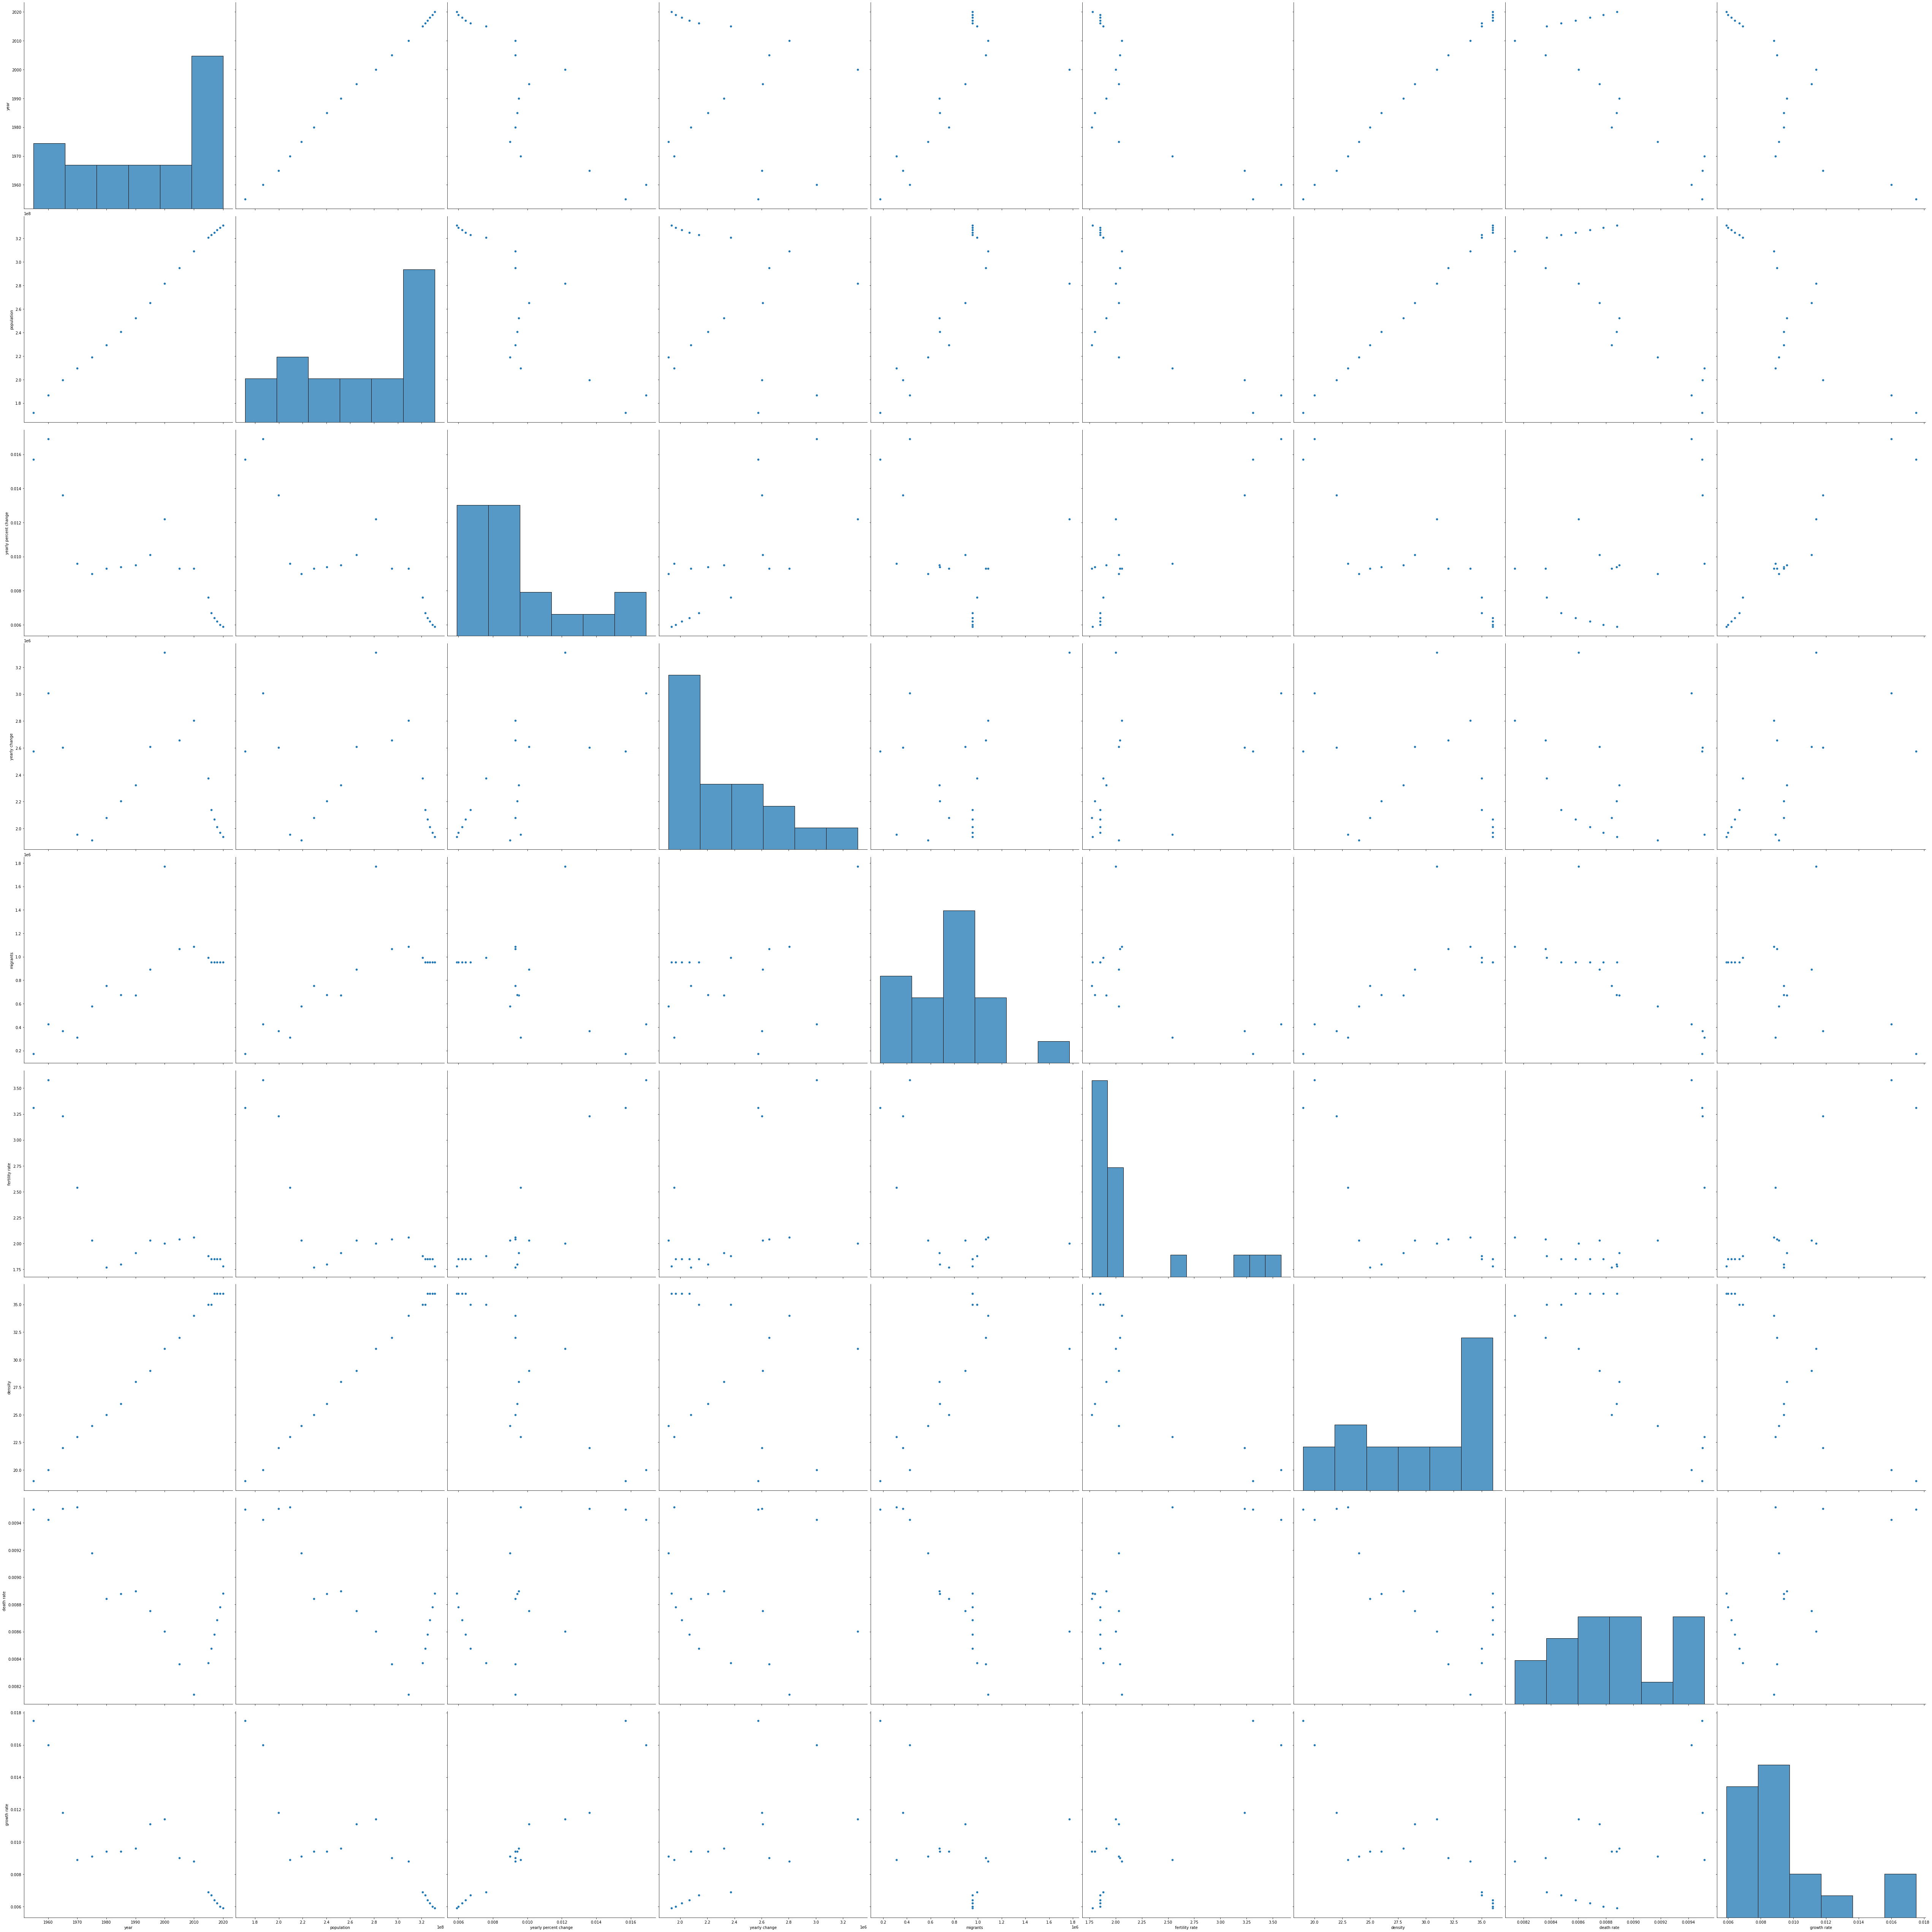

In [180]:
sns.pairplot(usa,height=8)
#I added pairplot for clarity. If you zoom in, we can see that some relationships are stronger than others

In [111]:
new_usa

,const,year,population,yearly percent change,yearly change,migrants,fertility rate,density,death rate,growth rate
0,1.0,2020,331002651,0.0059,1937734,954806,1.78,36,0.008880,0.0059
1,1.0,2019,329064917,0.0060,1968652,954806,1.85,36,0.008782,0.0060
2,1.0,2018,327096265,0.0062,2011509,954806,1.85,36,0.008685,0.0062
3,1.0,2017,325084756,0.0064,2068761,954806,1.85,36,0.008580,0.0064
4,1.0,2016,323015995,0.0067,2137685,954806,1.85,35,0.008475,0.0067
5,1.0,2015,320878310,0.0076,2373367,992343,1.88,35,0.008369,0.0069
6,1.0,2010,309011475,0.0093,2803593,1085751,2.06,34,0.008138,0.0088
7,1.0,2005,294993511,0.0093,2656520,1066979,2.04,32,0.008362,0.0090
8,1.0,2000,281710909,0.0122,3309433,1771991,2.00,31,0.008603,0.0114
9,1.0,1995,265163745,0.0101,2608687,892751,2.03,29,0.008754,0.0111


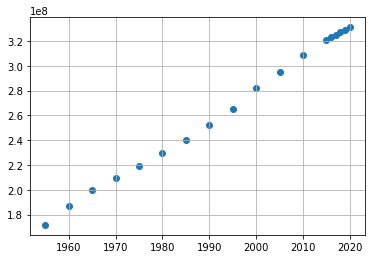

In [162]:
plt.scatter(x = usa['year'],y = usa['population'])
plt.grid()
plt.show()

In [197]:
def get_linear_OLS(x,y):
    '''Params:
    x: list or array type
    y: list or array type
    Outputs a linear OLS summary along with line of best fit'''
    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    results = model.fit()
    plt.scatter(x,y,s=8,label="Raw Data",c="green")
    plt.plot(x,results.fittedvalues,c="black",label="Best Fit Line")
    display(results.summary())
    display(results.params)
    return results
#NOTE THAT I AM STILL TESTING THIS
def get_multiple_OLS(df,y_label,plotting_x_label):
    '''Params:
    x: list or array type, multidimensonal
    Outputs a mulitple OLS summary along with line of best fit'''
    X = sm.add_constant(df)
    model = sm.OLS(X[y_label],X.drop(columns=[y_label]))
    results = model.fit()
    display(results.summary())
    plt.scatter(X[plotting_x_label],X[y_label])
    plt.plot(X[plotting_x_label],results.fittedvalues)
    display(results.params)
    return 

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            growth rate   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     69.90
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           3.41e-07
Time:                        19:58:03   Log-Likelihood:                 115.42
No. Observations:                  18   AIC:                            -212.8
Df Residuals:                       9   BIC:                            -204.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3384      0.974     -2.401      0.040      -4.542      -0.135
year                      0.0013      0.001      2.398      0.040    7.14e-05       0.002
population            -5.732e-10    2.3e-10     -2.489      0.034   -1.09e-09   -5.22e-11
yearly percent change     1.2541      0.577      2.174      0.058      -0.051       2.559
yearly change         -6.239e-09   2.13e-09     -2.922      0.017   -1.11e-08   -1.41e-09
migrants               4.381e-09   2.91e-09      1.504      0.167   -2.21e-09     1.1e-08
fertility rate            0.0057      0.004      1.475      0.174      -0.003       0.014
density                   0.0006      0.001      1.007      0.340      -0.001       0.002
death rate               -4.1507      1.970     -2.107      0.064      -8.608       0.307
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.350
Skew:                           0.251   Prob(JB):                        0.839
Kurtosis:                       2.537   Cond. No.                     4.47e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const                   -2.338380e+00
year                     1.257783e-03
population              -5.731788e-10
yearly percent change    1.254051e+00
yearly change           -6.238637e-09
migrants                 4.380760e-09
fertility rate           5.673969e-03
density                  5.624614e-04
death rate              -4.150720e+00
dtype: float64

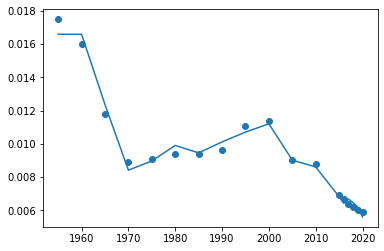

In [181]:
get_multiple_OLS(usa,"growth rate","year")

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             population   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6656.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           2.15e-22
Time:                        19:59:25   Log-Likelihood:                -291.59
No. Observations:                  18   AIC:                             587.2
Df Residuals:                      16   BIC:                             589.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.648e+09   6.03e+07    -77.142      0.000   -4.78e+09   -4.52e+09
year        2.465e+06   3.02e+04     81.587      0.000     2.4e+06    2.53e+06
==============================================================================
Omnibus:                        1.775   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.449
Skew:                          -0.631   Prob(JB):                        0.485
Kurtosis:                       2.416   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const   -4.647984e+09
year     2.464955e+06
dtype: float64

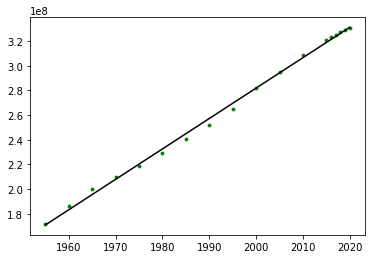

In [186]:
get_linear_OLS(usa['year'],usa["population"])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             population   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6656.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           2.15e-22
Time:                        20:06:07   Log-Likelihood:                -291.59
No. Observations:                  18   AIC:                             587.2
Df Residuals:                      16   BIC:                             589.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.648e+09   6.03e+07    -77.142      0.000   -4.78e+09   -4.52e+09
year        2.465e+06   3.02e+04     81.587      0.000     2.4e+06    2.53e+06
==============================================================================
Omnibus:                        1.775   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.449
Skew:                          -0.631   Prob(JB):                        0.485
Kurtosis:                       2.416   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

const   -4.647984e+09
year     2.464955e+06
dtype: float64

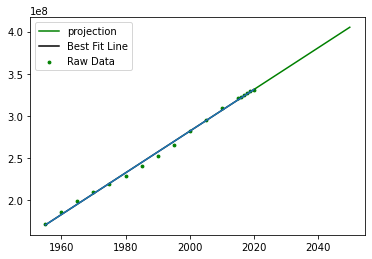

In [206]:
years_future = np.arange(2020,2055,5)
population_future = (2.464955*10**6)*(years_future)-4.647984e+09
plt.plot(years_future,population_future,color="green",label="projection")
plt.plot(usa['year'],get_linear_OLS(usa['year'],usa["population"]).fittedvalues)
plt.legend()

Here is the actual population of the US over 65 years (1955-2020)

In [183]:
class population():
    def __init__(self,start,growth,migrants):
        self.start = start
        self.growth = growth
        self.migrants = migrants
        
    def update_pop(self,time):
        t = []
        population = []
        for i in range(time):
            pop = self.start + self.start*self.growth - self.migrants
            self.start = pop
            t.append(i)
            population.append(pop)
        return t,population
    
    def plot(self,time):
        t,pop = self.update_pop(time)
        plt.plot(t,pop,label="Actual Population")
        plt.grid()
        plt.legend()
        plt.show()

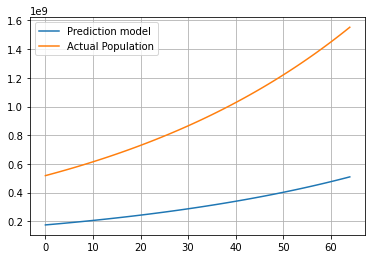

17   -1.785232e+08
dtype: float64

In [27]:
us = population(usa["population"][usa["year"]==1955],usa["growth rate"][usa["year"]==1955],usa["migrants"][usa["year"]==1955])
us_t,us_pop = us.update_pop(65)
plt.plot(us_t,us_pop,label="Prediction model")
us.plot(65)
usa.iloc[0,1]-us_pop[-1] #actual minus predicted US population for 2020

This model isn't accurate becuase it over estimates the population by a lot. This makes sense because there is no death rate. So I found the death rate of the US overtime and added it into the csv file that I loaded in. Below I am going to have an updated class which includes the death rate. 

In [32]:
class population_update():
    def __init__(self,start,growth,death,migrants):
        self.start = start
        self.growth = growth
        self.death = death
        self.migrants = migrants
        
    def update_pop(self,time):
        t = []
        population = []
        for i in range(time):
            pop = self.start + self.start*self.growth - self.start*self.death - self.migrants
            self.start = pop
            t.append(i)
            population.append(pop)
        return t,population
    
    def plot(self,time):
        t,pop = self.update_pop(time)
        plt.plot(t,pop)
        plt.grid()

57522526.424859524

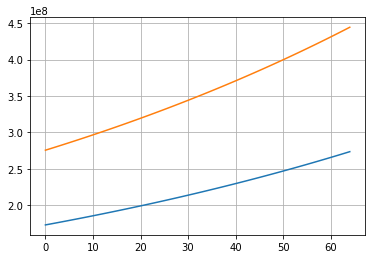

In [39]:
us2 = population_update(usa.iloc[17,1],usa.iloc[17,8],usa.iloc[17,7],usa.iloc[17,4])
us2_t,us2_pop = us2.update_pop(65)
plt.plot(us2_t,us2_pop,label="Predicted Population")
us2.plot(65)
usa.iloc[0,1]-us2_pop[-1] #actual value minus the predicted value

Okay so this model is better because its prediction is closer but now we are under estimating the population. I think this is because we aren't updating the population growth/death over the years.

## Results

_(What did you find when you carried out your methods? Some of your code related to
presenting results/figures/data may be replicated from the methods section or may only be present in
this section. All of the plots that you plan on using for your presentation should be present in this
section)_

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_